# Lecture 4. Data Augmentation for Convolutional Neural Networks

Compiled and organized by:
Christopher Monterola

Lecture is organized and compiled/taken from:

**1. Python Machine Learning, Second Edition, Sebastian Raschka and Vahid Mirjalili, Packt Publishing Ltd. Birmingham B3 2PB, UK Sept 2017.**

**2. Hands-On Machine Learning with Scikit-Learn and TensorFlow, Aurélien Géron, O'Reilly 2017.**

**3. Deep Learning with Python, Francois Chollet, Manning New York 2018.**

**4. 2018 Google LLC:** https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb#scrollTo=-5tES8rXFjux 


Here we illustrate how one can improve the accuracy (avoid overfitting) by data augmentation using keras for CNN.



# The Cats vs Dogs Data Set (Kaggle 2013)

The Dogs vs. Cats dataset that you’ll use isn’t packaged with Keras. It was made available by Kaggle as part of a computer-vision competition in late 2013, back when CNN weren’t mainstream. You can download the original dataset from www.kaggle.com/c/dogs-vs-cats/data (you’ll need to create a Kaggle account if you don’t already
have one).

The pictures are medium-resolution color JPEGs. Figure below shows some examples.

![cats_vs_dogs_samples](https://user-images.githubusercontent.com/25600601/134775470-7cf33e7e-f2d0-4a89-85b1-4963bf1c99da.jpg)


Unsurprisingly, the dogs-versus-cats Kaggle competition in 2013 was won by entrants who used CNN. The best entries achieved up to 95% accuracy. In this example, you’ll get up to $83\%$ accuracy for test set even though you’ll train your models on less than 10% of the data that was available to the competitors.

This dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543 MB (compressed). After downloading and uncompressing it, you’ll create a new dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.


# Step 1: Get the Data: Copy images to training, validation, and test directories

In [1]:
##IF YOU WANT TO RUN IN YOUR OWN DIRECTORY USE THIS COMMAND

#from google.colab import drive
#drive.mount('/content/drive')

#import os, shutil

#data_dir = '/content/drive/MyDrive/Teaching/AboitizLectures/Lecture4/'

## The path to the directory where the original
## dataset was uncompressed
#original_dataset_dir = data_dir +'dogs_vs_cats/train'

## The directory where we will
## store our smaller dataset
#base_dir = 'dogs_vs_cats/results/'
#os.makedirs(base_dir, exist_ok=True)

Mounted at /content/drive


In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-09-28 08:00:13--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.161.176, 172.217.174.208, 142.250.204.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.161.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  10.7MB/s    in 6.1s    

2021-09-28 08:00:20 (10.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Here are now the filenames of the `cats` and `dogs` `train` directories (file naming conventions are the same in the `validation` directory):

In [4]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.578.jpg', 'cat.596.jpg', 'cat.652.jpg', 'cat.435.jpg', 'cat.819.jpg', 'cat.953.jpg', 'cat.670.jpg', 'cat.562.jpg', 'cat.743.jpg', 'cat.479.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [6]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [7]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [8]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))


total validation dog images: 500


Let's look at the Dogs and Cat Images

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

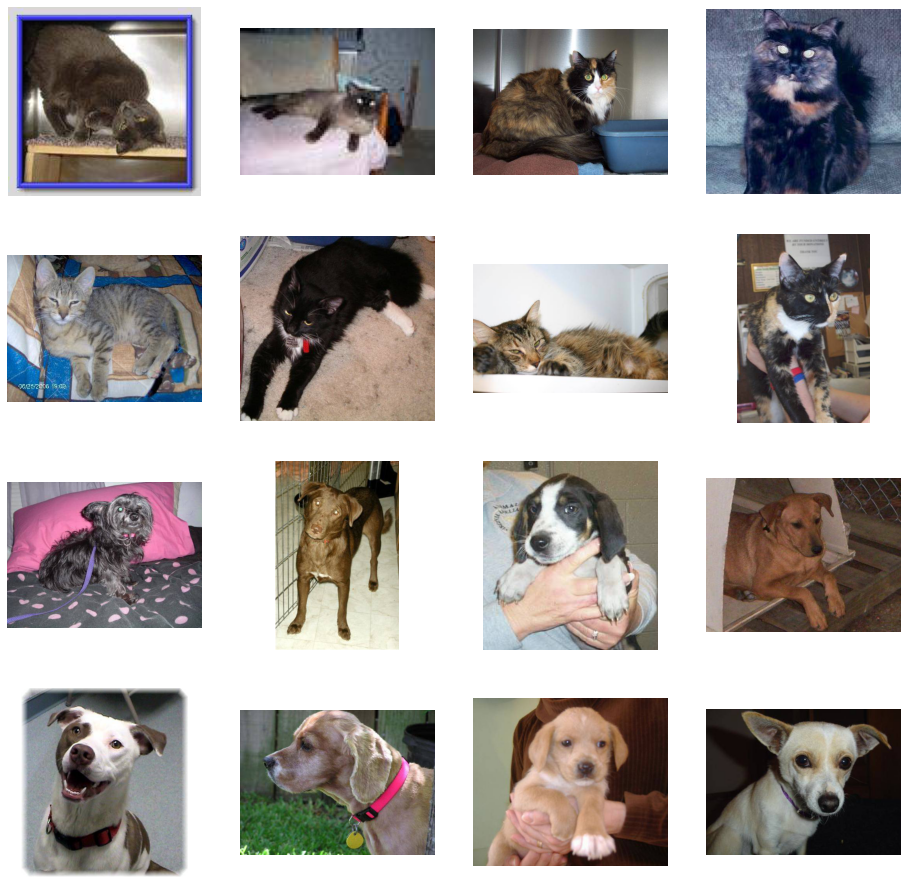

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


So you do indeed have 2,000 training images, 1,000 validation images, and 1,000 test images. Each split contains the same number of samples from each class: this is a balanced binary-classification problem, which means classification accuracy will be an appropriate measure of success.

# Step 2: Building your network

You built a small CNN for MNIST in the previous example, so you should be familiar with such CNN. You’ll reuse the same general structure: the CNN will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers. But because you’re dealing with bigger images and a more complex problem (previously we used MNIST with $28 \times 28$ size and single channel), you’ll make your network larger, accordingly: it will have one more Conv2D + MaxPooling2D stage. This serves both to augment the capacity of the network and to further reduce the size of the feature maps so they aren’t overly large when you reach the Flatten layer. Here, because you start from inputs of size 150 × 150 (a somewhat arbitrary choice), you end up with feature maps of size 7 × 7 just before the Flatten layer.

**NOTE: The depth of the feature maps progressively increases in the network (from 32 to 128), whereas the size of the feature maps decreases (from 148 × 148 to 7 × 7). This is a pattern you’ll see in almost all CNN. Because you’re attacking a binary-classification problem, you’ll end the network with a single unit (a Dense layer of size 1) and a threshold function (we will be using sigmoid activation). This unit will encode the probability that the network is looking at one class or the other.**

## Here we instantiate a small CNN for dogs vs. cats classification

In [11]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Let’s look at how the dimensions of the feature maps change with every successive layer:

In [12]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

For the compilation step, you’ll go with the RMSprop optimizer, as usual. Because you
ended the network with a single sigmoid unit, you’ll use binary crossentropy as the
loss (as a reminder, check out table in **Notebook 3** for a cheatsheet on what loss function to use in
various situations).

## Here, we configure the model for training

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

# Step 3: Data preprocessing

As you know by now, data should be formatted into appropriately preprocessed floating point tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:

1 Read the picture files.   
2 Decode the JPEG content to RGB grids of pixels.   
3 Convert these into floating-point tensors.   
4 Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).    


It may seem a bit daunting, but fortunately Keras has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator, which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors. This is what you’ll use here.

## Using ImageDataGenerator to read images from directories

<img width="824" alt="keras_preprocessing" src="https://user-images.githubusercontent.com/25600601/134776180-0852c010-d537-4683-9f27-6dceed0d4a7b.png">



In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let’s look at the output of one of these generators: it yields batches of 150 × 150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)). There are 20 samples in each batch (the batch size). Note that the generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, you need to break the iteration loop at some point: 
    

In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Let’s fit the model to the data using the generator. You do so using the fit_generator method, the equivalent of fit for data generators like this one. It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over. This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator—that is, after having run for steps_per_epoch gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.    

When using fit_generator, you can pass a validation_data argument, much as with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly; thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.



# Step 4: Fitting the model using a batch generator

In [16]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,  # 2000 images = batch_size * steps
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50  # 1000 images = batch_size * steps
        )

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 290s 3s/step - loss: 0.9268 - acc: 0.4872 - val_loss: 0.6907 - val_acc: 0.5440
Epoch 2/20
100/100 [==============================] - 277s 3s/step - loss: 0.6976 - acc: 0.5436 - val_loss: 0.6361 - val_acc: 0.6340
Epoch 3/20
100/100 [==============================] - 274s 3s/step - loss: 0.6306 - acc: 0.6641 - val_loss: 0.6037 - val_acc: 0.6700
Epoch 4/20
100/100 [==============================] - 275s 3s/step - loss: 0.5600 - acc: 0.7154 - val_loss: 0.6181 - val_acc: 0.6450
Epoch 5/20
100/100 [==============================] - 272s 3s/step - loss: 0.5407 - acc: 0.7293 - val_loss: 0.5534 - val_acc: 0.7370
Epoch 6/20
100/100 [==============================] - 271s 3s/step - loss: 0.4897 - acc: 0.7646 - val_loss: 0.5601 - val_acc: 0.7230
Epoch 7/20
100/100 [==============================] - 269s 3s/step - loss: 0.4622 - acc: 0.7832 - val_loss: 0.5800 - val_acc: 0.6960
Epoch 8/20
100/100 [==============================] - 271s 3s/step - 

It’s good practice to always save your models after training.

# Step 5: Saving the model

In [17]:
model.save(data_dir +'cats_and_dogs_small_Aboitiz.h5')

NameError: name 'data_dir' is not defined

Let’s plot the loss and accuracy of the model over the training and validation data during training 

# Step 6: Displaying curves of loss and accuracy during training

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–73%. The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0. Because you have relatively few training samples (2,000), overfitting will be your number-one concern. You already know about a number of techniques that can help mitigate overfitting such as L2 regularization (or weight decay). Another way is dropout or forced pruning of weights. We’re now going to work below with a new one, specific to computer vision and used almost universally when processing images with deep-learning models: data augmentation. This is very important when you have limited data for images!

# Step 7: Implement Data augmentation

Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data. Given infinite data, your model would be exposed to every possible aspect of the data distribution at hand: you would never overfit. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better. In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator instance. Let’s get started with an example.

## 7A. Setting up a data augmentation configuration via ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

These are just a few of the options available (for more, see the Keras documentation).

Let’s quickly go over this code:
        
         rotation_range is a value in degrees, a range within which to randomly rotate pictures.   
        
         width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
        
         shear_range is for randomly applying shearing transformations.   
        
         zoom_range is for randomly zooming inside pictures.    
        
         horizontal_flip is for randomly flipping half the images horizontally—relevant when there are no   assumptions of horizontal asymmetry (for example, real-world pictures).    
        
         fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift. Default is 'nearest' but can be any of the following: 'constant', 'reflect' or 'wrap'. 

Let’s look at the augmented images (see below). first the **cheat sheet**

## Displaying some randomly augmented training images

<img width="704" alt="augmentation1" src="https://user-images.githubusercontent.com/25600601/134776311-d7b1085f-a886-47aa-9ebe-27c3374ae588.png">

<img width="728" alt="augmentation2" src="https://user-images.githubusercontent.com/25600601/134776326-d96b5339-a18f-468b-88c0-ca6a6dccd4e9.png">

## 7B. Actual Implementation

In [ ]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[143]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 6 == 0:
        break
plt.show()

Here are some good resource to visualize the above operations: 

(1) https://machinelearningmastery.com/image-augmentation-deep-learning-keras/    

(2) https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844

If you train a new network using this data-augmentation configuration, the network will never see the same input twice (very low probability). But the inputs it sees are still heavily intercorrelated, because they come from a small number of original images—you can’t produce new information, you can only remix existing information. As such, this may not be enough to completely get rid of overfitting. 



# Step 8: Adding Dropout


To further fight overfitting, let's also add a Dropout layer to your model, right before the densely connected classifier (see figure below taken from https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5). Dropout prevents overfitting by preventing a layer's "over-reliance" to some the inputs that are normally biased by order of appearance or duplicity. Since you drop hidden outputs at random, the intuition why 'dropout' improves generalization is that the layer are forced to scan all of its inputs during training. Dropout was introduced by Srivastava, Hinton *et al* (first figure of the article shown below), you can download the article here or look for the file in ALICE. https://drive.google.com/viewerng/viewer?url=http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf

<img width="981" alt="dropout" src="https://user-images.githubusercontent.com/25600601/134776375-ad90c14a-1a42-4ce9-8d84-13f4e6a99e26.png">

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
 model.summary()

Let’s train the network using data augmentation and dropout.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20, 
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Recording the training / validation loss / accuracy at each epoch using the model.fit method that returns an History callback, which has a history attribute containing the lists of successive losses and other metrics.



# Step 9: One More time, saving the model ...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, shutil

data_dir = '/content/drive/MyDrive/Teaching/AboitizLectures/Lecture4/'

In [ ]:
model.save(data_dir + 'cats_and_dogs_small_2_aboitiz.h5')

And let’s plot the results again. Thanks to data augmentation and dropout, you’re no longer overfitting: the training curves are closely tracking the validation curves. You now reach an accuracy of 83+%, a 11-12% relative improvement over the non-regularized model.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

By using regularization techniques even further, and by tuning the network’s parameters (such as the number of filters per convolution layer, or the number of layers in the network), you may be able to get an even better accuracy, likely up to 86% or 87%. But it would prove difficult to go any higher just by training your own CNN from scratch, because you have so little data to work with. As a next step to improve your accuracy on this problem, you’ll have to use a pretrained model.

In [ ]:
with open(data_dir + 'cats_and_dogs_small_2_model_architecture.json', 'w') as f:
    f.write(model.to_json())

In [ ]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open(data_dir + 'cats_and_dogs_small_2_model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('cats_and_dogs_small_2_aboitiz.h5')

In [ ]:
model.summary()

#Step 10: Prototype testing

Let's test below the performance of the system with images from the Net

In [ ]:
from PIL import Image
%matplotlib inline

from tensorflow.keras.preprocessing import image
import numpy as np

img_path = data_dir + 'cat_test.jpeg'

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)/255.
#x = preprocess_input(x)

#CAT =0, DOG =1
Prediction = model.predict(x)
if Prediction >= .5:
    print("DOG")
else:
    print("CAT")

print(Prediction)

img = Image.open(img_path)
img